In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import astropy.stats as ast

In [321]:
gas=pd.read_csv("sco-cen.csv",index_col=0)

In [322]:
gas.head()

,x,y,z,vx,vy,vz,xa,ya,za,id
0,-97.194204,-85.197691,-88.438109,6.158076,213.199731,2.396119,-8177.220968,-76.188003,87.482545,1.0
1,-42.552635,-87.704235,-78.201006,6.114842,212.755781,2.094273,-8183.120524,-40.427102,45.255358,1.0
2,-56.618763,-94.316484,-82.573662,4.171674,212.820311,2.174304,-8174.420201,-47.702305,56.747690,1.0
3,-76.672044,-59.663928,-96.309322,5.310793,212.972091,4.034915,-8196.926817,-83.285586,61.093306,1.0
4,-37.592208,-75.046785,-86.366686,6.777685,211.303613,2.055336,-8190.531598,-49.706114,34.744833,1.0


In [54]:
pctokm=(1*u.pc).to(u.km)/u.km

In [55]:
yrtos=(1*u.yr).to(u.s)

In [319]:
tstep=yrtos*1e5

219


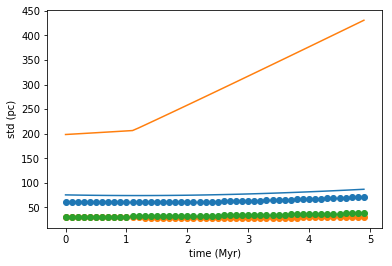

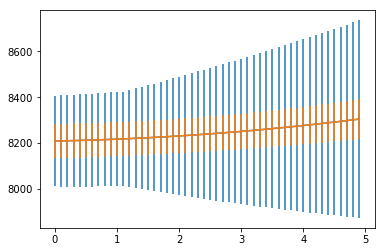

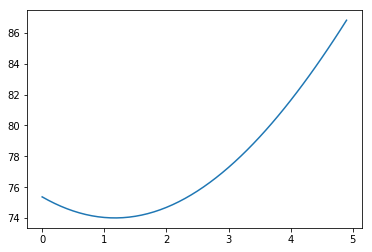

1.2


In [479]:
cgas=gas
cgas=cgas.drop([cgas.index[74]])
#cgas=cgas.drop([cgas.index[213]])

# take one in ten as bootstrap CV
# save with names
#cgas=cgas.drop([cgas.index[7],cgas.index[11],cgas.index[10]])

print(len(cgas))
time=[]
mxdist=[]
mndist=[]
devl=[]
amax=[]
for it in range(50):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[np.std(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
plt.plot(time,np.linalg.norm(devl,axis=1))
plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
plt.show()
print(time[np.argmin(np.linalg.norm(devl,axis=1))])

14
5.2


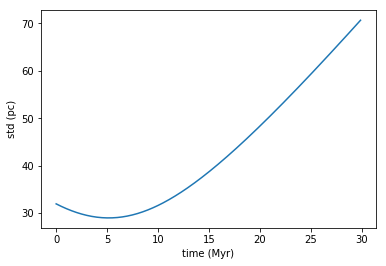

24
2.1


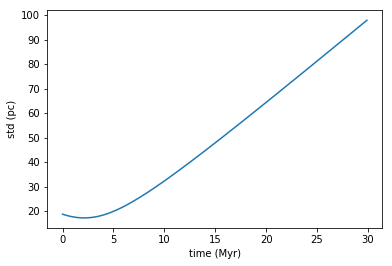

123
0.0


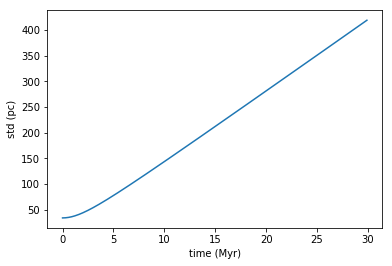

13
4.5


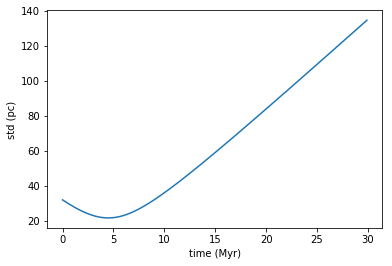

46
0.0


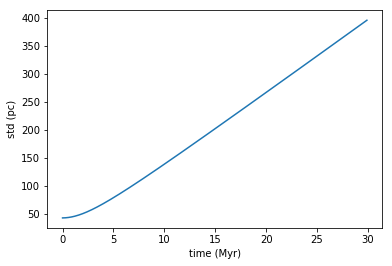

In [422]:
for i in range(1,6):
    cgas=gas[gas.id==i]
    print(len(cgas))
    time=[]
    mxdist=[]
    mndist=[]
    devl=[]
    for it in range(300):
        cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
#        devl+=[ast.median_absolute_deviation(cev,axis=0)/pctokm]
        devl+=[np.std(cev,axis=0)/pctokm]
        mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
        mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
        time+=[it/10]
    devl=np.array(devl)
#    for i in range(3):
#        plt.scatter(time,devl[:,i])
#    plt.plot(time,np.linalg.norm(devl,axis=1))
#    plt.plot(time,mxdist)
#    plt.show()
#    plt.errorbar(time,mndist,mxdist)
#    plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
#    plt.show()
    plt.plot(time,np.linalg.norm(devl,axis=1))
    print(time[np.argmin(np.linalg.norm(devl,axis=1))])
    plt.xlabel("time (Myr)")
    plt.ylabel("std (pc)")
    plt.show()


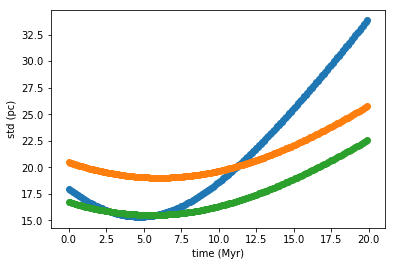

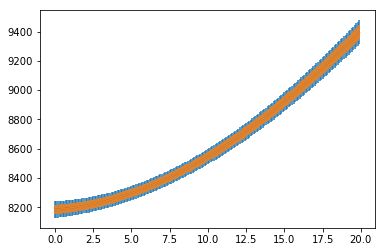

5.2


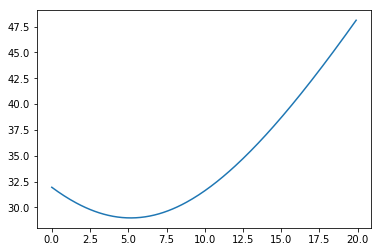

In [488]:
cgas=gas[gas.id==1]
time=[]
mxdist=[]
mndist=[]
amax=[]
devl=[]
for it in range(200):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[np.std(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
#plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
print(time[np.argmin(np.linalg.norm(devl,axis=1))])


plt.show()

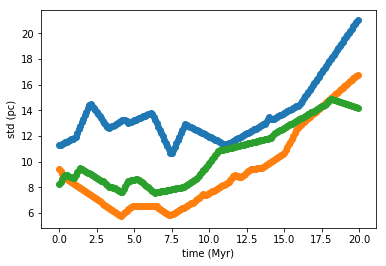

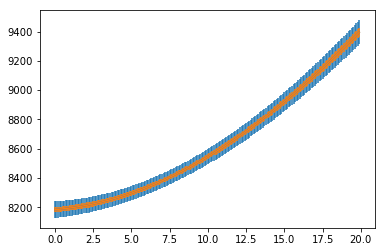

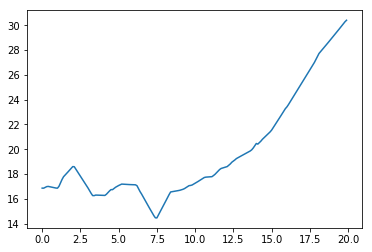

In [430]:
cgas=gas[gas.id==1]
#cgas=cgas.drop([cgas.index[7]])
time=[]
mxdist=[]
mndist=[]
amax=[]
devl=[]
for it in range(200):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[ast.median_absolute_deviation(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
#plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
plt.show()

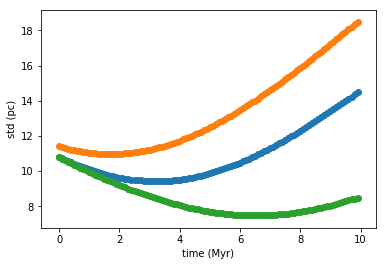

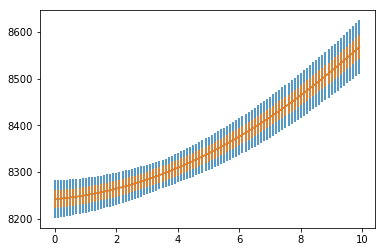

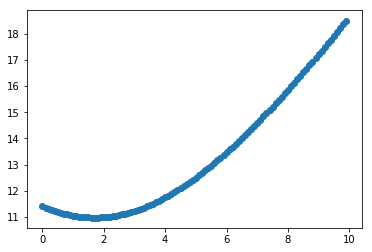

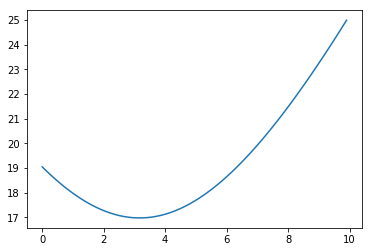

In [349]:
cgas=gas[gas.id==2]
cgas=cgas.drop([cgas.index[10]])
time=[]
mxdist=[]
mndist=[]
amax=[]
devl=[]
for it in range(100):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[np.std(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
#plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.scatter(time,devl[:,1])
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
plt.show()

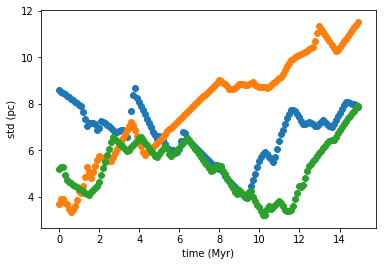

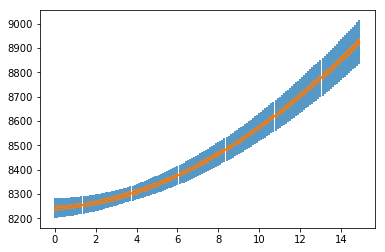

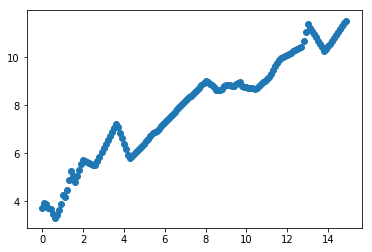

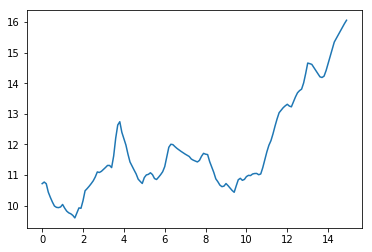

In [354]:
cgas=gas[gas.id==2]
cgas=cgas.drop([cgas.index[10]])
time=[]
mxdist=[]
mndist=[]
amax=[]
devl=[]
for it in range(150):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[ast.median_absolute_deviation(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
#plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.scatter(time,devl[:,1])
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
plt.show()

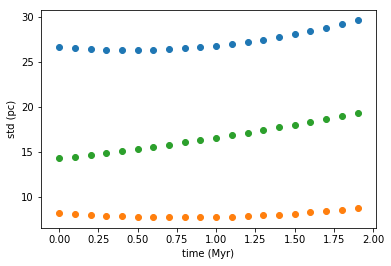

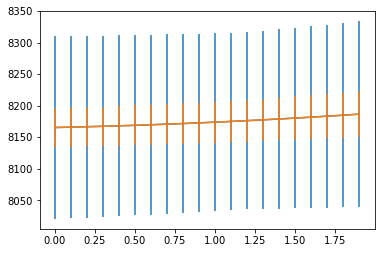

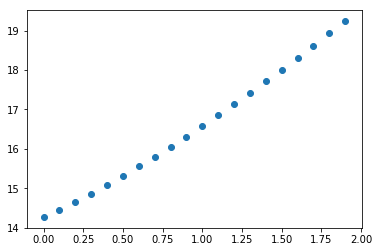

0.2


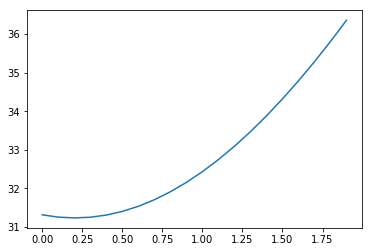

In [376]:
cgas=gas[gas.id==3]
cgas=cgas.drop([cgas.index[36],cgas.index[94]])
time=[]
mxdist=[]
mndist=[]
amax=[]
devl=[]
for it in range(20):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[np.std(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
#plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.scatter(time,devl[:,2])
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
print(time[np.argmin(np.linalg.norm(devl,axis=1))])
plt.show()

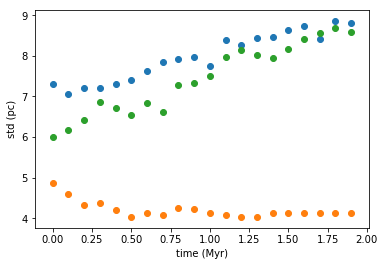

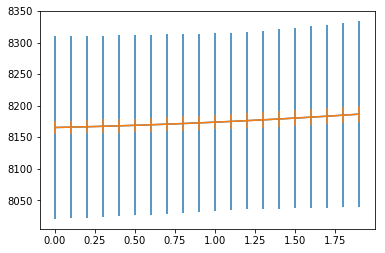

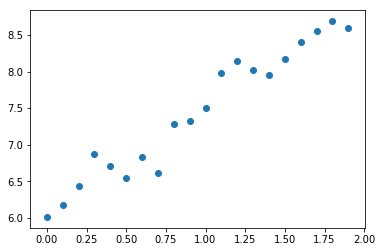

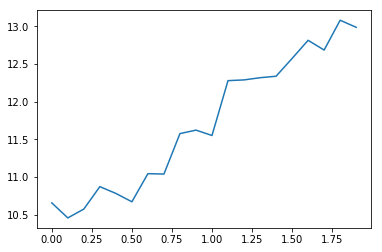

In [370]:
cgas=gas[gas.id==3]
cgas=cgas.drop([cgas.index[36],cgas.index[94]])
time=[]
mxdist=[]
mndist=[]
amax=[]
devl=[]
for it in range(20):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[ast.median_absolute_deviation(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
#plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.scatter(time,devl[:,2])
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
plt.show()

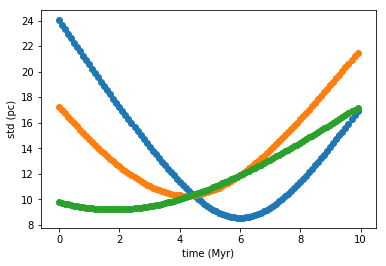

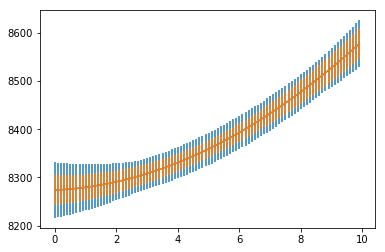

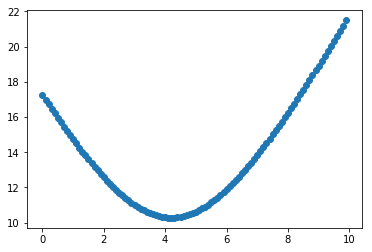

4.8


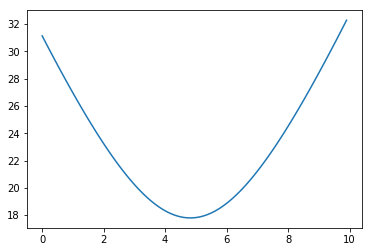

In [388]:
cgas=gas[gas.id==4]
cgas=cgas.drop([cgas.index[1],cgas.index[7]])
#cgas=cgas.drop([cgas.index[0],cgas.index[1]])
time=[]
mxdist=[]
mndist=[]
amax=[]
devl=[]
for it in range(100):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[np.std(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
#plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.scatter(time,devl[:,1])
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
print(time[np.argmin(np.linalg.norm(devl,axis=1))])
plt.show()

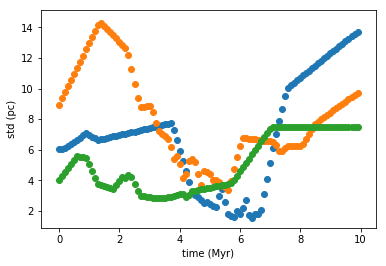

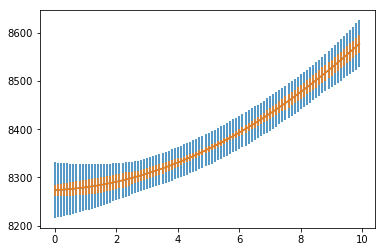

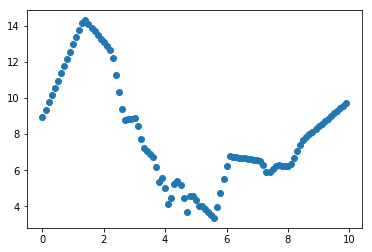

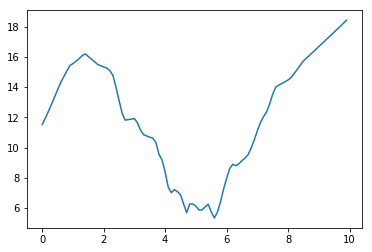

In [390]:
cgas=gas[gas.id==4]
cgas=cgas.drop([cgas.index[7],cgas.index[1]])
time=[]
mxdist=[]
mndist=[]
amax=[]
devl=[]
for it in range(100):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[ast.median_absolute_deviation(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
#plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.scatter(time,devl[:,1])
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
plt.show()

46


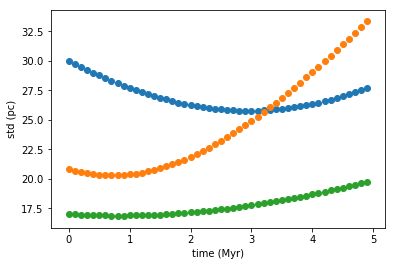

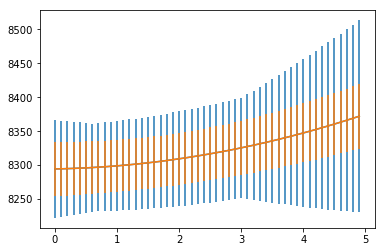

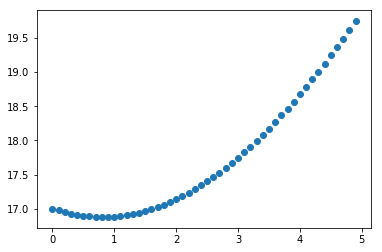

1.6


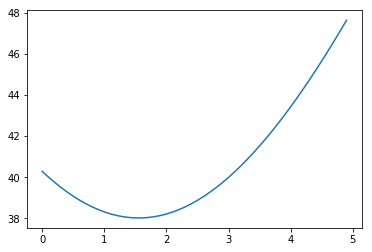

In [410]:
cgas=gas[gas.id==5]
print(len(cgas))
cgas=cgas.drop([cgas.index[38],cgas.index[40]])
cgas=cgas.drop([cgas.index[22]])


time=[]
mxdist=[]
mndist=[]
amax=[]
devl=[]
for it in range(50):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[np.std(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
#plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.scatter(time,devl[:,2])
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
print(time[np.argmin(np.linalg.norm(devl,axis=1))])
plt.show()

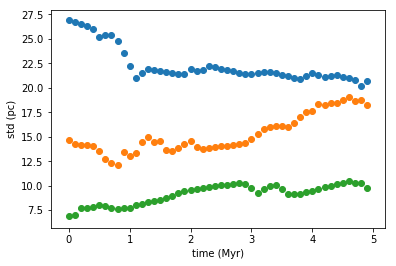

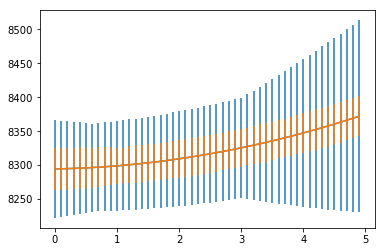

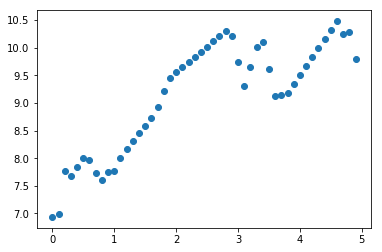

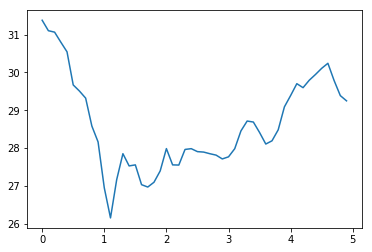

In [411]:
cgas=gas[gas.id==5]
cgas=cgas.drop([cgas.index[38],cgas.index[40]])
cgas=cgas.drop([cgas.index[22]])
time=[]
mxdist=[]
mndist=[]
amax=[]
devl=[]
for it in range(50):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    devl+=[ast.median_absolute_deviation(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
#plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.scatter(time,devl[:,2])
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
plt.show()

In [220]:
from sklearn.mixture import GaussianMixture as GMM



In [391]:
X=gas[['xa','ya','za','vz','vy','vz']]

In [392]:
for kcomp in range(2,7):
    gmm = GMM(kcomp, covariance_type='full', random_state=0)
    gmm.fit(X)
    print(kcomp,gmm.bic(X))
    cluster_label = gmm.predict(X)

2 6190.19651708
3 6194.49620623
4 6328.84657466
5 6212.38522819
6 6081.58103815


0 10


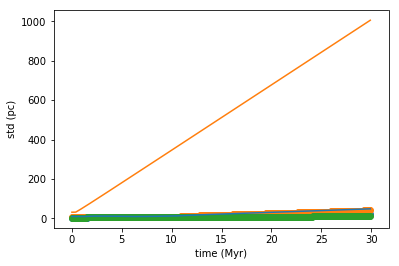

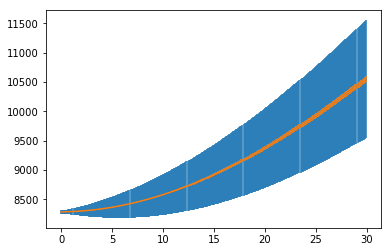

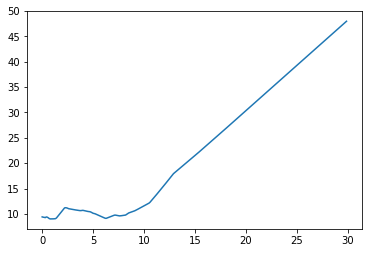

1 91


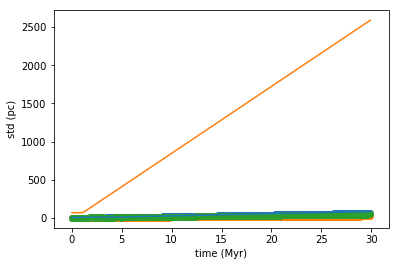

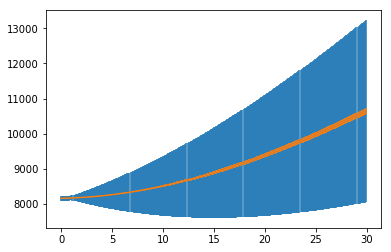

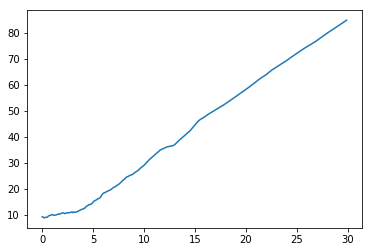

2 45


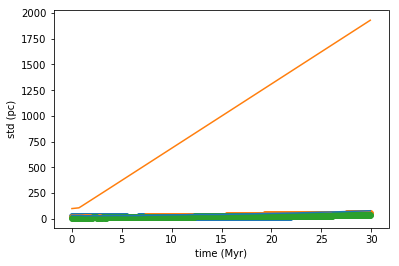

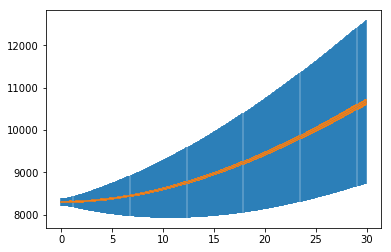

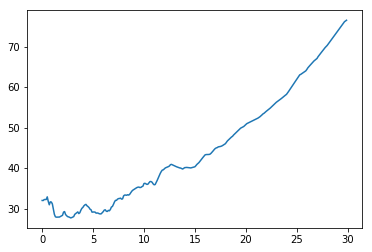

3 31


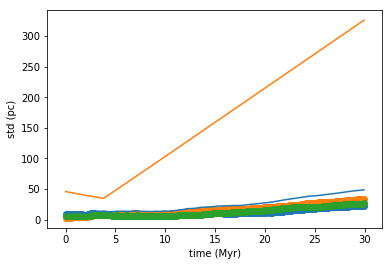

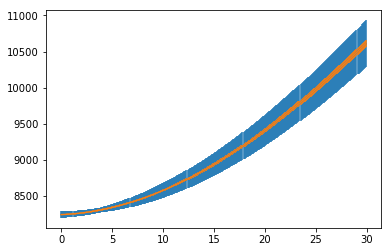

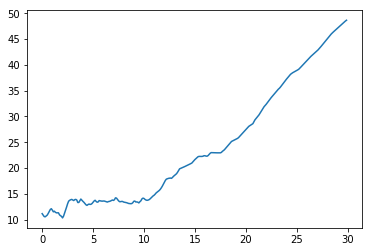

4 5


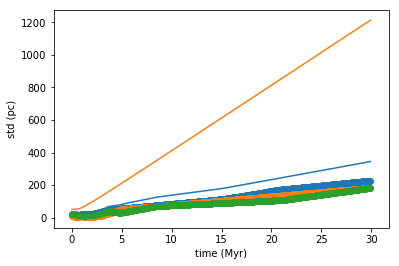

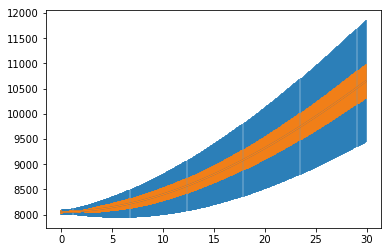

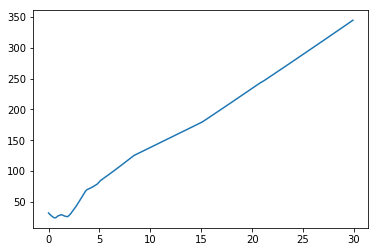

5 38


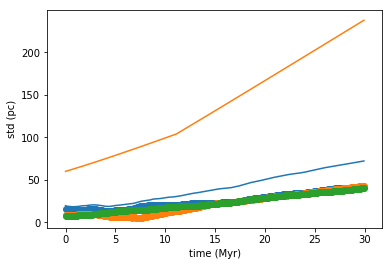

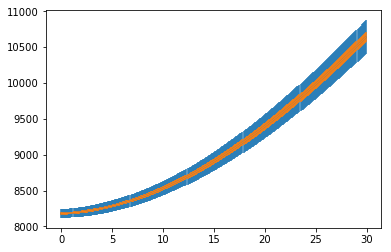

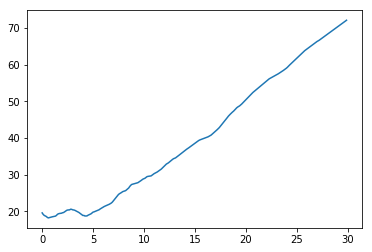

In [434]:
for i in range(6):
    cgas=gas[cluster_label==i]
    print(i,len(cgas))
    time=[]
    mxdist=[]
    mndist=[]
    devl=[]
    for it in range(300):
        cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
        devl+=[ast.median_absolute_deviation(cev,axis=0)/pctokm]
        mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
        mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
        time+=[it/10]
    devl=np.array(devl)
    for i in range(3):
        plt.scatter(time,devl[:,i])
    plt.plot(time,np.linalg.norm(devl,axis=1))
    plt.plot(time,mxdist)
    plt.xlabel("time (Myr)")
    plt.ylabel("std (pc)")
    plt.show()
    plt.errorbar(time,mndist,mxdist)
    plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
    plt.show()
    plt.plot(time,np.linalg.norm(devl,axis=1))
    plt.show()


0 10


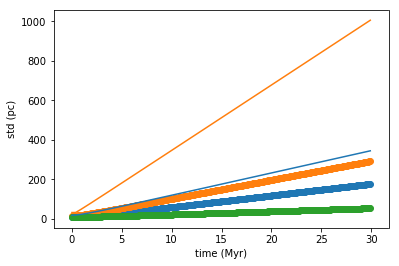

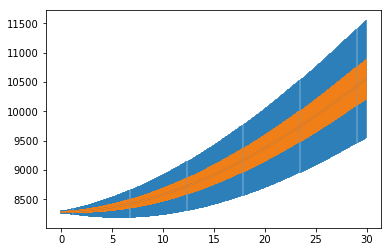

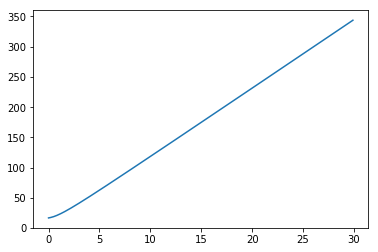

1 91


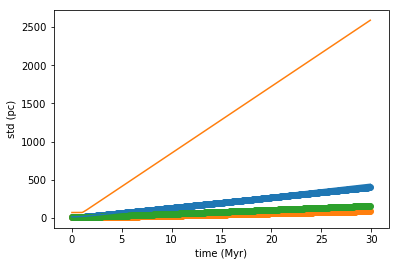

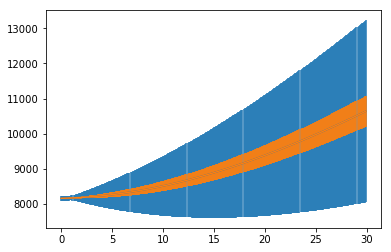

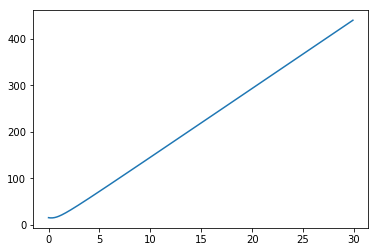

2 45


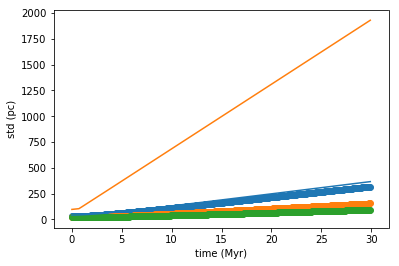

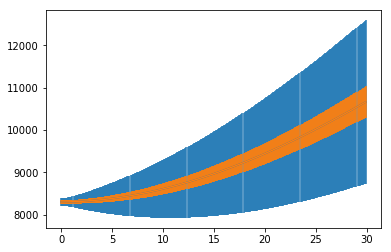

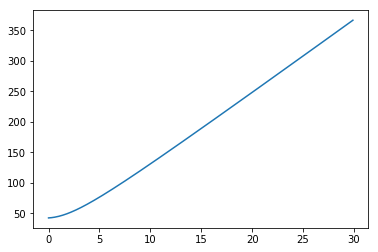

3 31


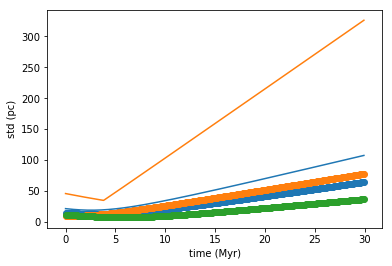

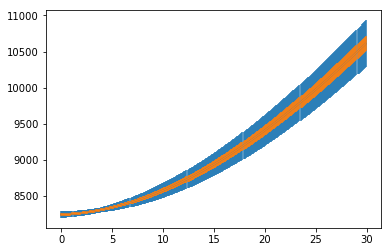

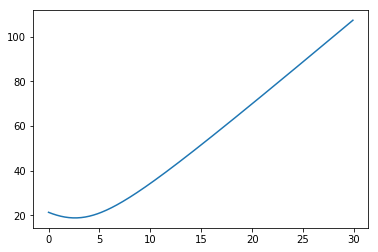

4 5


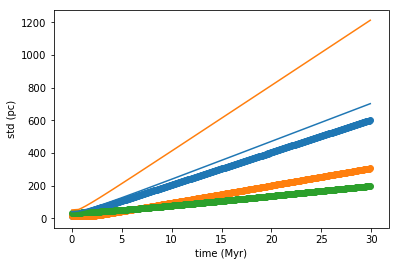

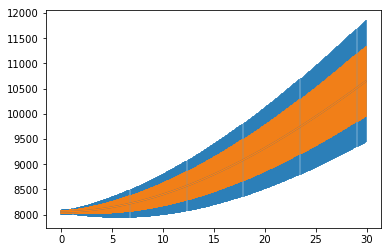

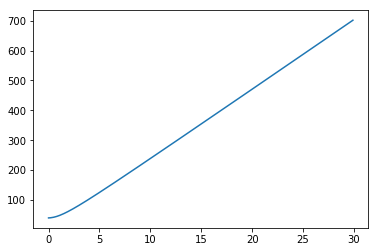

5 38


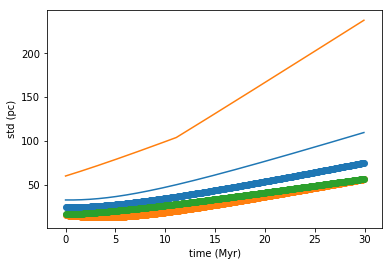

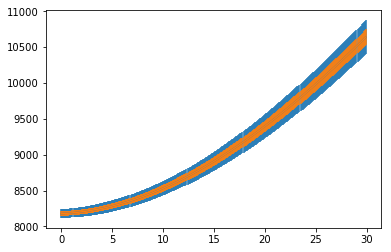

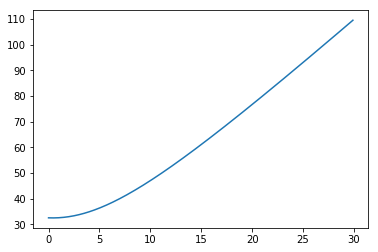

In [435]:
for i in range(6):
    cgas=gas[cluster_label==i]
    print(i,len(cgas))
    time=[]
    mxdist=[]
    mndist=[]
    devl=[]
    for it in range(300):
        cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
        devl+=[np.std(cev,axis=0)/pctokm]
        mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
        mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
        time+=[it/10]
    devl=np.array(devl)
    for i in range(3):
        plt.scatter(time,devl[:,i])
    plt.plot(time,np.linalg.norm(devl,axis=1))
    plt.plot(time,mxdist)
    plt.xlabel("time (Myr)")
    plt.ylabel("std (pc)")
    plt.show()
    plt.errorbar(time,mndist,mxdist)
    plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
    plt.show()
    plt.plot(time,np.linalg.norm(devl,axis=1))
    plt.show()


145


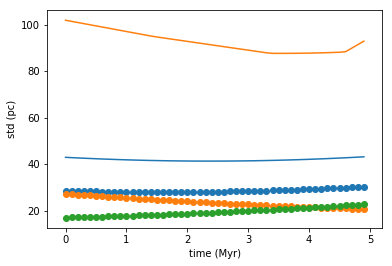

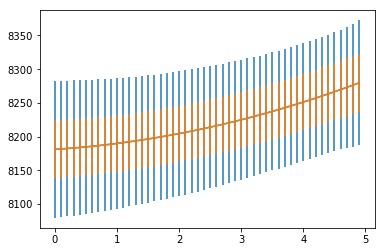

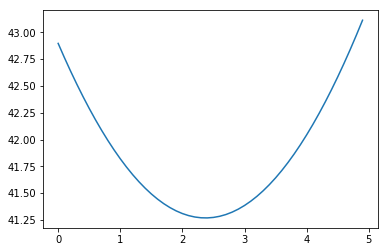

2.4


In [512]:
cgas=gas[(gas.id==1)|(gas.id==2)|(gas.id==3)]
cgas=cgas.drop([cgas.index[74]])
cgas=cgas.drop([cgas.index[68]])
cgas=cgas.drop([cgas.index[130]])
cgas=cgas.drop([cgas.index[59],cgas.index[119]])
cgas=cgas.drop([cgas.index[67],cgas.index[38]])
cgas=cgas.drop([cgas.index[39],cgas.index[104]])
cgas=cgas.drop([cgas.index[35],cgas.index[30],cgas.index[111],cgas.index[61]])
cgas=cgas.drop([cgas.index[32],cgas.index[15],cgas.index[67]])
#cgas=cgas.drop([cgas.index[19],cgas.index[22],cgas.index[23],cgas.index[34]])








# take one in ten as bootstrap CV
# save with names
#cgas=cgas.drop([cgas.index[7],cgas.index[11],cgas.index[10]])

print(len(cgas))
time=[]
mxdist=[]
mndist=[]
devl=[]
amax=[]

mat=np.zeros(3)

for it in range(50):
    cev=np.array(pctokm*cgas[['xa','ya','za']])-np.array(cgas[['vx','vy','vz']]*tstep*it)
    mat=np.vstack((mat,cev))
    devl+=[np.std(cev,axis=0)/pctokm]
    mndist+=[np.linalg.norm(cev.mean(axis=0))/pctokm]
    mxdist+=[np.max(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    amax+=[np.argmax(np.linalg.norm(cev-cev.mean(axis=0),axis=1)/pctokm)]
    time+=[it/10]
devl=np.array(devl)
for i in range(3):
    plt.scatter(time,devl[:,i])
plt.plot(time,np.linalg.norm(devl,axis=1))
plt.plot(time,mxdist)
plt.xlabel("time (Myr)")
plt.ylabel("std (pc)")
plt.show()
plt.errorbar(time,mndist,mxdist)
plt.errorbar(time,mndist,np.linalg.norm(devl,axis=1))
plt.show()
plt.plot(time,np.linalg.norm(devl,axis=1))
plt.show()
print(time[np.argmin(np.linalg.norm(devl,axis=1))])

In [510]:
amax

[19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 34,
 34,
 34,
 34]

In [474]:
mat=mat[1:]

In [478]:
np.ones(len(cev))*it

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [475]:
mat=np.stack((mat,cev.T))

array([[ -2.52322674e+17,  -2.35091614e+15,   2.69942927e+15],
       [ -2.52504715e+17,  -1.24745003e+15,   1.39643445e+15],
       [ -2.52236252e+17,  -1.47193934e+15,   1.75105076e+15],
       ..., 
       [ -2.51627675e+17,  -3.41659565e+16,   3.07440568e+15],
       [ -2.52898797e+17,  -3.39333299e+16,   2.54277421e+15],
       [ -2.52595304e+17,  -3.40790359e+16,   2.31760423e+15]])